#### Advanced Statistics for Data Science (Spring 2022)
# Home Assignment 4
#### Topics:
- ANOVA


#### Due: 10/05/2022 by 18:30

#### Instructions:
- Write your name, Student ID, and date in the cell below. 
- Submit a copy of this notebook with code filled in the relevant places as the solution of coding exercises.
- For theoretic exercises, you can either write your solution in the notebook using $\LaTeX$ or submit additional notes.

<hr>
<hr>

**Name**: Ofir Nesher

**Student ID**: 204502926

**Date**: 01/05/2022

$
\newcommand{\Id}{{\mathbf{I}}}  
\newcommand{\SSE}{\mathsf{SSE}}
\newcommand{\SSR}{\mathsf{SSR}}
\newcommand{\MSE}{\mathsf{MSE}}
\newcommand{\simiid}{\overset{iid}{\sim}}
\newcommand{\ex}{\mathbb E}
\newcommand{\var}{\mathrm{Var}}
\newcommand{\Cov}[2]{{\mathrm{Cov}  \left(#1, #2 \right)}}
\newcommand{\one}[1]{\mathbf 1 {\left\{#1\right\}}}
\newcommand{\SE}[1]{\mathrm{SE} \left[#1\right]}
\newcommand{\reals}{\mathbb R}
\newcommand{\Ncal}{\mathcal N}
\newcommand{\abs}[1]{\ensuremath{\left\vert#1\right\vert}}
\newcommand{\rank}{\operatorname{rank}}
\newcommand{\tr}{\operatorname{Tr}}
\newcommand{\diag}{\operatorname{diag}}
\newcommand{\sign}{\operatorname{sign}}
$


<hr>
<hr>

# Problem 1 (Solving LS using SVD)
Consider the housing prices dataset (``housing_prices.csv``). Use houses of lot size smaller than 15000 ft.

1. Find the least squares coefficient of the linear model with target variable ``SalePrice`` and the 16 predictors:
``['LotArea',  'YearBuilt',
  'GarageCars', 'YrSold', 'MoSold', 'Fireplaces',
  'HalfBath', 'LowQualFinSF', 'TotalBsmtSF',
  '1stFlrSF', 'LotFrontage', 'ScreenPorch',
   'WoodDeckSF', 'OverallCond', 'BsmtUnfSF']`` 
plus a constant term. Remove all entries in which one or more of these predictors is missing. 
 - By inverting the matrix $Z^\top Z$. Denote the solution $\hat{\beta}$.
 - Using the SVD method. Here, decide that $\sigma_i > 0$ if $\sigma_i / \sigma_1 > 10^{-6}$. Denote the solution $\hat{\beta}^{SVD}$.
 - In which method $R^2$ is smaller?
2. Plot $\hat{y}$ and $\hat{y}^{SVD}$ over the same panel to convince yourself that both methods resulted in similar fitted responses.
3. Plot $\log(|\hat{\beta}_i/\hat{\beta}^{SVD}_i|)$ vs. $i$ for $i=1,\ldots,p$ and indicate the covariate whose coefficient exhibits the largest difference between the methods.

The point: When there are many predictors, it is likely that $Z$ will be rank deficient in the sense that some of its singular values are very small. Removing those singular values is usually a good practice; it is important to observe how this removal affects the solution. 

The largest difference is for the first predictor, which is the constant covariate. We can check that this result makes sense by fitting a new model without the constant covaraite and test whether the residuals in the smaller new model are not significantly different from those in the original model.

You can use the code below to read and arrange the data

In [137]:
import pandas as pd
import numpy as np

target = 'SalePrice'
lo_predictors = ['const', 'SalePrice', 'LotArea', 'YearBuilt',
                 'GarageCars', 'YrSold', 'MoSold', 'Fireplaces',
                 'HalfBath', 'LowQualFinSF', 'TotalBsmtSF',
                 '1stFlrSF', 'LotFrontage', 'ScreenPorch',
                 'WoodDeckSF', 'OverallCond', 'BsmtUnfSF']

data = pd.read_csv("housing_prices.csv")
data = data[data.LotArea < 15000]  # we focus on small lots
data['const'] = 1  # add constant term
data = data.filter(lo_predictors).dropna()  # remove all other columns

y = data[target].values
X = data.drop(target, axis=1)
Z = X.values
n, p = Z.shape

### **Answers**:

#### 1.

In [138]:
betas_hat = np.dot((np.dot(np.linalg.inv(np.dot(Z.T, Z)), Z.T)), y)
y_hat = Z.dot(betas_hat)

In [139]:
for i, feature in enumerate(X.columns):
    print(f'beta_{i} ({feature}) = {betas_hat[i]}')

beta_0 (const) = -3039719.746770506
beta_1 (LotArea) = 2.978147078820329
beta_2 (YearBuilt) = 616.8396784188517
beta_3 (GarageCars) = 21256.547086620998
beta_4 (YrSold) = 884.9474678758138
beta_5 (MoSold) = 983.7943648802681
beta_6 (Fireplaces) = 16763.35942481487
beta_7 (HalfBath) = 27915.65103716661
beta_8 (LowQualFinSF) = 68.96051889240943
beta_9 (TotalBsmtSF) = 43.89618695666137
beta_10 (1stFlrSF) = 41.275209770486086
beta_11 (LotFrontage) = 0.7334589918268932
beta_12 (ScreenPorch) = 22.668025926562713
beta_13 (WoodDeckSF) = 30.830913850875596
beta_14 (OverallCond) = 7715.939211041576
beta_15 (BsmtUnfSF) = -8.101915234063107


In [140]:
def r_squared(y, y_hat):
    SS_Tot = np.sum((y - y.mean()) ** 2)
    SS_Fit = np.sum((y_hat - y.mean()) ** 2)
    # SS_Res = np.sum((y - y_hat) ** 2)
    return SS_Fit / SS_Tot

In [141]:
r_squared_betas_hat = r_squared(y, y_hat)
print(f'R^2 (betas_hat): {r_squared_betas_hat}')

R^2 (betas_hat): 0.7452057267966207


In [142]:
# obtaining the parameters of regression line
betas_hat_svd = np.linalg.lstsq(Z, y, rcond=13 - 6)[0]
betas_hat_svd

array([-3.03971975e+06,  2.97814708e+00,  6.16839678e+02,  2.12565471e+04,
        8.84947468e+02,  9.83794365e+02,  1.67633594e+04,  2.79156510e+04,
        6.89605189e+01,  4.38961870e+01,  4.12752098e+01,  7.33458992e-01,
        2.26680259e+01,  3.08309139e+01,  7.71593921e+03, -8.10191523e+00])

In [143]:
# https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html
U, sigma, VT = np.linalg.svd(Z)
y_star = np.dot(U.T, y)
# sigma[sigma / sigma[0] <= 1e-6] = 0
# betas_star = y_star / sigma.reshape(-1, 1)
# betas_hat_svd_2 = np.dot(VT.T, betas_star)
# y_hat_svd = np.dot(U.T, y)

In [144]:
r_squared_betas_svd = r_squared(y, y_star)
print(f'R^2 (betas_hat_svd): {r_squared_betas_svd}')

R^2 (betas_hat_svd): 12.43419418275706


So R^2^ (betas_hat_svd) is larger than R^2^ (betas_hat)

#### 2.

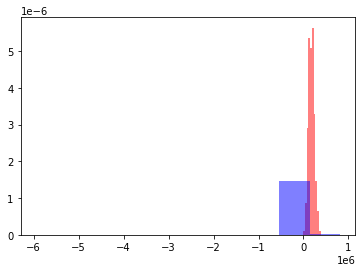

In [148]:
import matplotlib.pyplot as plt

plt.hist(y_hat, alpha=.5, color='r', density=True)
plt.hist(y_star, alpha=.5, color='b', density=True)
plt.show()

#### 3.

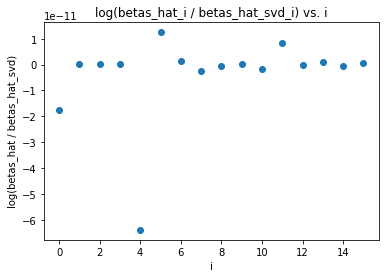

In [162]:
plt.scatter(list(range(0, p)), np.log(betas_hat / betas_hat_svd))
plt.xlabel('i')
plt.ylabel('log(betas_hat / betas_hat_svd)')
plt.title('log(betas_hat_i / betas_hat_svd_i) vs. i')
plt.show()

---
## Problem 2 ($t$-test is a kind of ANOVA)
Consider the following two-sample problem. The data is
$$
y_{ij} = \mu_i + \epsilon_{ij},\qquad j=1,\ldots,n_i,\quad i=0,1. 
$$

1. Find the statistic $t$ for the two-sample $t$ test (using of the observable variables)
2. Write the ANOVA table for $k=2$ and find the F statistic $F$ (using of the observable variables)
3. Conclude that $t^2 = F$. 
4. Does the test that rejects when $|t| > t_{n-1}^{1-\alpha/2}$ has larger power than the test that rejects when $F > F_{1,n-1}^{1-\alpha}$? less? same?


### **Answers**:

#### 1.
Cell mean model:
$y_{ij} = \mu_i + \epsilon_{ij},\qquad j=1,\ldots,n_i,\quad i=0,1$
$\epsilon_{ij} \sim^{iid}  N(0, \sigma^2)$


As seen in lecture 6, we can rewrite this model in matrix notation:
$Y \sim N(Z\beta, \sigma^2 I_n)$ where
$$Y = \begin{bmatrix}
 y_{01} \\
 y_{02} \\
 \vdots \\
 y_{0 n_0} \\
 y_{11} \\
 y_{12} \\
 \vdots \\
 y_{1 n_1}
\end{bmatrix}
\quad

Z = \begin{bmatrix}
 1 & 0\\
 1 & 0\\
 \vdots & \vdots \\
 1 & 0\\
 0 & 1\\
 0 & 1\\
 \vdots & \vdots \\
 0 & 1\\
\end{bmatrix}
\in \mathbb{R}^{n \times 2}
\quad

\beta = \begin{bmatrix}
 \mu_0 \\
 \mu_1 \\
\end{bmatrix}
$$

Our null hypothesis is $H_0: \mu_0 = \mu_1$.

We will develop a test against $H_0$ based on properties of the linear model.

$\bar{Y_0} = \frac{1}{n_0}\sum_{i=1}^{n_0} Y_i$


$$
t = \frac{\bar{Y_1} - \bar{Y_0}}{s \sqrt{\frac{1}{n_1} + \frac{1}{n_0}}}
$$

#### 2.


#### 3.


#### 4.


---
## Problem 3 (ANOVA Decomposition)
In class, we considered the decomposition:
$$
\begin{equation}
\mathrm{SS}_{tot} = \mathrm{SS}_{within} + \mathrm{SS}_{between}
\label{eq:ANOVA} \tag{1}
\end{equation}
$$
where
$$
\mathrm{SS}_{between} = \sum_{i=1}^k n_i(\bar{y}_{i\cdot} - \bar{y}_{\cdot \cdot})^2,\qquad \mathrm{SS}_{within} = \sum_{i=1}^k \sum_{j=1}^{n_i} (y_{ij} - \bar{y}_{i\cdot})^2
$$
Prove $\eqref{eq:ANOVA}$ by expanding:
$$
\mathrm{SS}_{tot} = \sum_{i=1}^k \sum_{j=1}^{n_i} (y_{ij} - \bar{y}_{\cdot \cdot})^2 = \sum_{i=1}^k \sum_{j=1}^{n_i} (y_{ij} - \bar{y}_{i\cdot} + \bar{y}_{i\cdot} - \bar{y}_{\cdot \cdot})^2 = ...
$$

### **Answers**:

---
## Problem 4 (ANOVA and multiple testing in Practice)

Consider Israeli wines in the wine dataset ``winemag-data_first150k.csv`` used in class (downloaded from Kaggle https://www.kaggle.com/datasets/zynicide/wine-reviews?select=winemag-data_first150k.csv). Use ANOVA to measure the effect of winery (``winery``) on the quality (``points``) of wine of variety ``Cabernet Sauvignon``.
1. Load dataset; keep only relevant records according to the fields ``country`` and ``variety``; remove wineries with 1 or fewer samples (because we cannot do ANOVA for those)
2. Plot the boxplot with ``winery`` as the x-axis and ``points`` as the y-axis.
3. Use ANOVA to figure out whether some wineries make better Cabernets than others; print the ANOVA table and explain your conclusion
4. Find which wineries have Cabernets ranked higher than others:
 - Run all paired t-tests; how many of the test's P-values fall below 0.05? is it more than what is expected if all tests are null?
 - Use Bonferroni's method to decide which wineries ranked significantly higher than others by reporting on the list of pairs whose P-value is significant after Bonferroni's correction. Also indicate which one is ranked higher out of each pair.

### **Answers**:

In [221]:
import seaborn as sns

np.random.seed(2021)
plt.rcParams["figure.figsize"] = (20, 7)
plt.rcParams.update({'font.size': 18})

#### 1.

In [217]:
wine_df = pd.read_csv("winemag-data_first150k.csv")
wine_df = wine_df[(wine_df['country'] == 'Israel') & (wine_df['variety'] == 'Cabernet Sauvignon')]
all_wineries = wine_df['winery'].value_counts() > 1
valid_wineries = list(all_wineries[all_wineries].index.values)
wine_df = wine_df[wine_df['winery'].isin(valid_wineries)]
print(wine_df.describe())

          Unnamed: 0      points       price
count     135.000000  135.000000  128.000000
mean    61128.814815   87.688889   35.601562
std     41325.606285    2.303361   16.290831
min        81.000000   80.000000   12.000000
25%     28743.000000   86.000000   21.750000
50%     52552.000000   88.000000   36.000000
75%     91863.000000   90.000000   42.000000
max    150558.000000   91.000000   75.000000


#### 2.

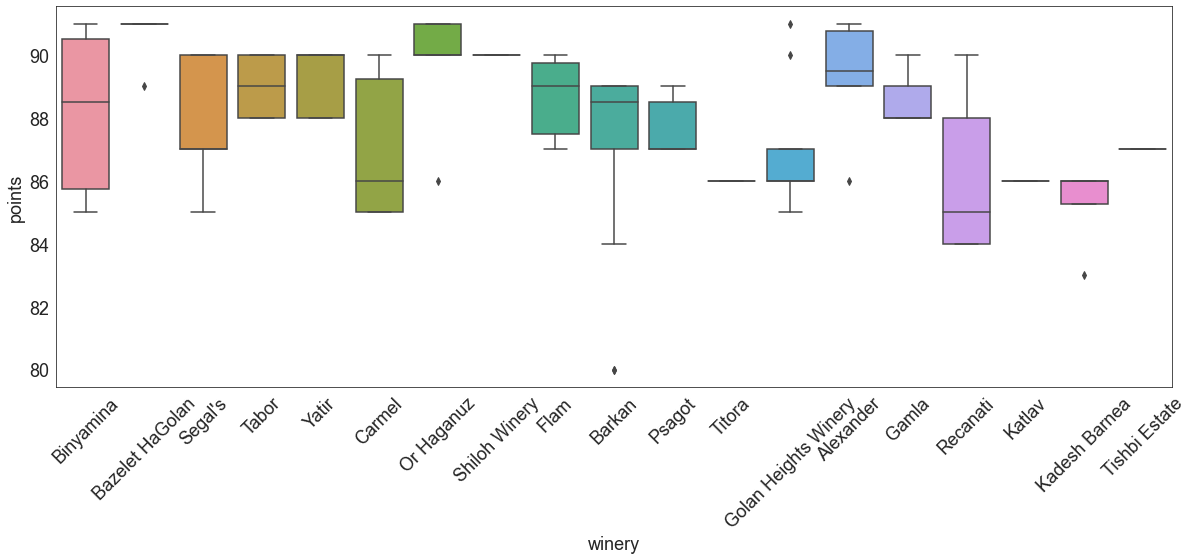

In [222]:
sns.boxplot(x='winery', y='points', data=wine_df)
plt.xticks(rotation=45)
plt.show()

#### 3.

#### 4.